<a href="https://colab.research.google.com/github/eSHUN1408/DATA-SCIENCE-AND-MACHINE-LEARNING/blob/main/bankloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
"models"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
"metrics"
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
#vizuals
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px


In [66]:
#importing the data
data=pd.read_excel('/content/loan.xlsx')
data.head(5)

,age,ed,employ,address,income,status
0,41,3,17,12,176,1
1,27,1,10,6,31,0
2,40,1,15,14,55,0
3,41,1,15,14,120,0
4,24,2,2,0,28,1


In [65]:
#general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        850 non-null    int64 
 1   ed         850 non-null    int64 
 2   employ     850 non-null    int64 
 3   address    850 non-null    int64 
 4   income     850 non-null    int64 
 5   status     850 non-null    int64 
 6   emp_group  850 non-null    object
 7   age_group  850 non-null    object
dtypes: int64(6), object(2)
memory usage: 53.2+ KB


In [67]:
#checking for null values
data.isnull().sum()

age        0
ed         0
employ     0
address    0
income     0
status     0
dtype: int64

#Insights/Exploratory Data Analysis(EDA) on Employment

In [68]:
#check the unique values in employment
data['employ'].unique()

array([17, 10, 15,  2,  5, 20, 12,  3,  0,  4, 24,  6, 22,  9, 13, 23,  8,
        1, 25,  7, 19, 18, 16, 11, 26, 14, 21, 29, 27, 31, 30, 28, 33])

In [69]:
#Grouping Employment into categories in years of employment
data.loc[data['employ'].between(0,1),'emp_group']='no employment'
data.loc[data['employ'].between(1,11),'emp_group']='1-10'
data.loc[data['employ'].between(11,21),'emp_group']='11-20'
data.loc[data['employ'].between(21,31),'emp_group']='21-30'
data.loc[data['employ'].between(31,40),'emp_group']='31+'
print(data['emp_group'].value_counts().sort_values(ascending=True))

31+                5
21-30             48
no employment     72
11-20            234
1-10             491
Name: emp_group, dtype: int64


In [70]:
#employment grouping percentages
employment=data['emp_group'].value_counts()
employment2=employment.index
number_of_customers=employment.values
figure=px.pie(data,values=number_of_customers,names=employment2,hole=0.5,
 title='Years of Eployment')
figure.show()

In [71]:
#employment grouping with status
data.groupby('emp_group')['status'].value_counts(normalize=True)*100

emp_group      status
1-10           0         65.580448
               1         34.419552
11-20          0         78.632479
               1         21.367521
21-30          0         83.333333
               1         16.666667
31+            0         60.000000
               1         40.000000
no employment  0         50.000000
               1         50.000000
Name: status, dtype: float64

65.58% of the customers with emploment between 1-10 years didn’t default while 34.42% of the customers with 1-10 years of employment defaulted

78.63% of the customers with employment between 11-20 years of employment didn’t default while 21.37% of the customers within 11-20 years of employment defaulted

83.33% of the customers with employment between 21-30 years didn’t default while 16.667% of the customers within 21-30 years of employment defaulted

60.00% of the customers with employment of 30 years and above didn’t default while 40.00% of the customers with 30 years and above of employment defaulted

50.00% of the customers with no employment didn’t default while 50.00% of the customers with no years of employment defaulted

<Axes: xlabel='emp_group', ylabel='count'>

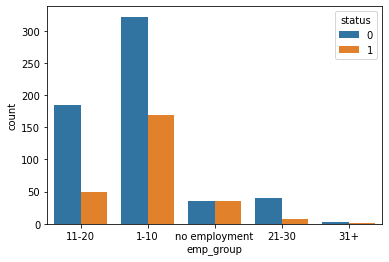

In [72]:
#countplot of employment with status 
sns.countplot(x='emp_group',hue='status',data=data)

# Insights/Exploratory Data Analysis(EDA) on Education

In [ ]:
#unique values in Education
data['ed'].unique()

array([3, 1, 2, 4, 5])

In [ ]:
#number of people and years of education
data['ed'].value_counts().sort_values(ascending=False)

1    460
2    235
3    101
4     49
5      5
Name: ed, dtype: int64

In [ ]:
education=data['ed'].value_counts()
edu2=education.index
number_of_customers=education.values
figure=px.pie(data,values=number_of_customers,names=edu2,hole=0.5,
 title='Years of Education count plot')
figure.show()

In [73]:
#percentage of education with status
data.groupby('ed')['status'].value_counts(normalize=True)*100

ed  status
1   0         71.956522
    1         28.043478
2   0         66.808511
    1         33.191489
3   0         64.356436
    1         35.643564
4   0         57.142857
    1         42.857143
5   0         80.000000
    1         20.000000
Name: status, dtype: float64

71.96% of the customers with a year of education didn’t default while
28.04% of the customers with a year of education defaulted

66.81% of the customers with two years of education didn’t default while
33.19% of the customers with two yeasr of education defaulted

64.36% of the customers with three years of education didn’t default while
35.64% of the customers with three years of education defaulted

57.14% of the customers with four years of education didn’t default while
42.85% of the customers with four years of education defaulted

80% of the customers with five years of education didn’t default while
20% of the customers with five Years of education defaulted

<Axes: xlabel='ed', ylabel='count'>

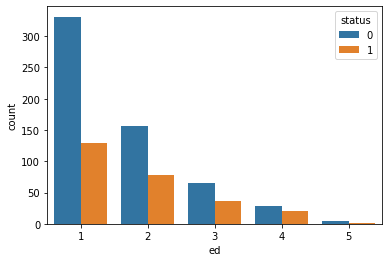

In [74]:
#countplot of education with status
sns.countplot(x='ed',hue='status',data=data)

## Insights/Exploratory Data Analysis(EDA) on Age

In [75]:
#unique values in age
data['age'].unique()

array([41, 27, 40, 24, 39, 43, 36, 25, 52, 37, 48, 47, 28, 29, 21, 45, 33,
       26, 30, 32, 23, 34, 42, 35, 46, 38, 50, 31, 53, 54, 22, 55, 44, 51,
       49, 20, 56])

In [ ]:
 #number of people and years of education
data['age'].value_counts().sort_values(ascending=False).head()


29    51
31    42
39    41
35    40
34    38
Name: age, dtype: int64

In [77]:
#age grouping of customers
data.loc[data['age'].between(20,31),'age_group']='20-30'
data.loc[data['age'].between(31,41),'age_group']='31-40'
data.loc[data['age'].between(41,51),'age_group']='41-50'
data.loc[data['age'].between(51,100),'age_group']='51+'
print(data['age_group'].value_counts().sort_values(ascending=False))


31-40    348
20-30    286
41-50    185
51+       31
Name: age_group, dtype: int64


In [78]:
#percentage of age group with status
data.groupby('age_group')['status'].value_counts(normalize=True)*100

age_group  status
20-30      0         62.937063
           1         37.062937
31-40      0         72.126437
           1         27.873563
41-50      0         72.972973
           1         27.027027
51+        0         61.290323
           1         38.709677
Name: status, dtype: float64

62.94% of the customers within the age group 20-30 didn’t default while 37.06% of the customers within the age group 20-30 defaulted

72.13% of the customers within the age group 31-40 didn’t default while 27.87% of the customers within the age group 31-40 defaulted

72.97% of the customers within the age group 41-50 didn’t default while 27.03% of the customers within the age group 41-50 defaulted

61.29% of the customers with the age 51+ didn’t default while 38.70% of the customers with 51+ years defaulted


<Axes: xlabel='age_group', ylabel='count'>

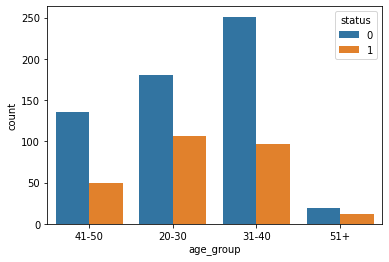

In [ ]:
sns.countplot(x='age_group',hue='status',data=data)

## Insights/Exploratory Data Analysis(EDA) on status

In [ ]:
data['status'].value_counts()

0    585
1    265
Name: status, dtype: int64

<Axes: xlabel='status', ylabel='count'>

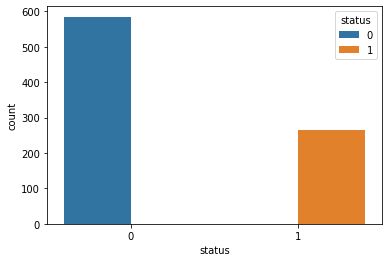

In [56]:
sns.countplot(x='status',hue='status',data=data)


In [60]:
status=data['status'].value_counts()
index=status.index
number_of_customers=status.values
figure=px.pie(data,values=number_of_customers,names=index,hole=0.5,
 title='countplot of status')
figure.show()

In [61]:
data.status.value_counts(normalize=True)*100

0    68.823529
1    31.176471
Name: status, dtype: float64

68.82% of the customers didn’t default while 31.18% of the customers defaulted


In [62]:
data.describe()

,age,ed,employ,address,income,status
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,0.311765
std,8.041432,0.927784,6.777884,6.895016,38.543054,0.463487
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,1.000000


In [63]:
data.corr()

,age,ed,employ,address,income,status
age,1.000000,0.012983,0.554241,0.599949,0.476218,-0.072621
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.078596
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.197202
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.089753
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035997
status,-0.072621,0.078596,-0.197202,-0.089753,-0.035997,1.000000


In [83]:
data.head()

,age,ed,employ,address,income,status,emp_group,age_group
0,41,3,17,12,176,1,11-20,41-50
1,27,1,10,6,31,0,1-10,20-30
2,40,1,15,14,55,0,11-20,31-40
3,41,1,15,14,120,0,11-20,41-50
4,24,2,2,0,28,1,1-10,20-30


In [84]:
data1=pd.read_excel('/content/loan.xlsx')

## Splitting the data into train and test

It is very advisable to use about 80% of the data for the train and 20% for the test for better accuracy


In [85]:
 x= data1.drop(columns='status', axis=1)
y = data1['status']
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 1)


In [91]:
#training of the model

In [92]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
Preds = LR.predict(X_train)
Logistic_Regression_Accuracy = accuracy_score(Preds,y_train)
print(f'Accuracy Score = {Logistic_Regression_Accuracy}')

Accuracy Score = 0.6897058823529412


In [93]:
#Testing of the modle

In [88]:
preds2 = LR.predict(X_test)
LR_AC2 = accuracy_score(preds2,y_test)
print(f'Accuracy Score = {LR_AC2}')


Accuracy Score = 0.6647058823529411


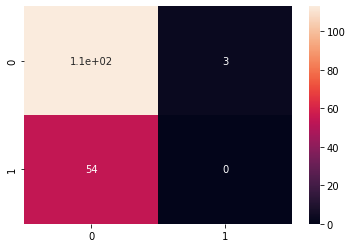

In [89]:
sns.heatmap(confusion_matrix(y_test, preds2), annot = True,);


In [90]:
print(classification_report(y_test, preds2))


              precision    recall  f1-score   support

           0       0.68      0.97      0.80       116
           1       0.00      0.00      0.00        54

    accuracy                           0.66       170
   macro avg       0.34      0.49      0.40       170
weighted avg       0.46      0.66      0.54       170

